In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from astropy import units as u 
from astropy.visualization import ZScaleInterval
from astropy.coordinates import SkyCoord

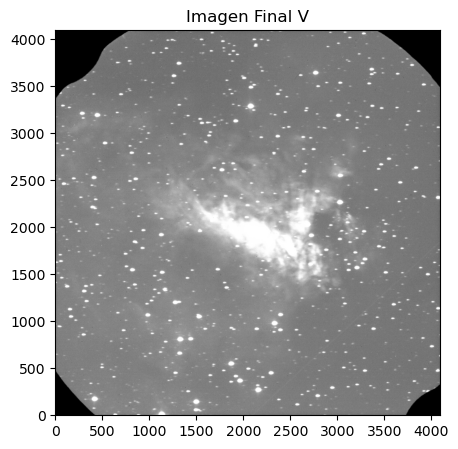

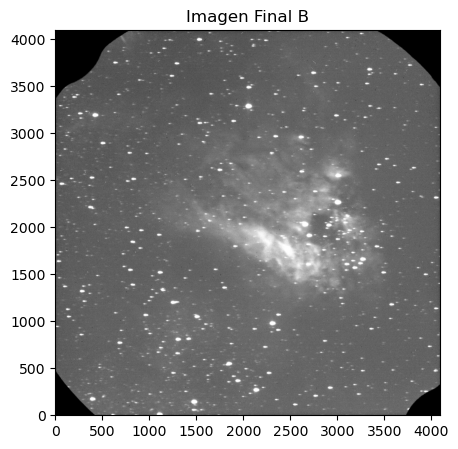

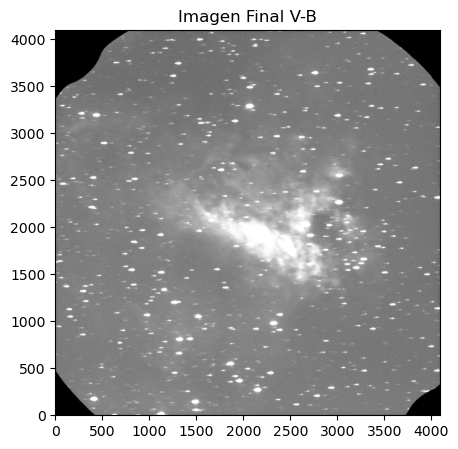

In [2]:
img_v = fits.open('Img_V.fits')[0].data 
img_b = fits.open('Img_B.fits')[0].data

img_prom= np.median([img_v, img_b],axis=0)

#IMAGEN FINAL FILTRO V
fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(img_v)

plt.imshow(img_v,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen Final V')
plt.show()

#IMAGEN FINAL FILTRO B
fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(img_b)

plt.imshow(img_b,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen Final B')
plt.show()

#IMAGEN FINAL FILTRO V-B
fig = plt.figure(figsize=(5,5))
zscale_b = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_b.get_limits(img_prom)

plt.imshow(img_prom,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Imagen Final V-B')
plt.show()

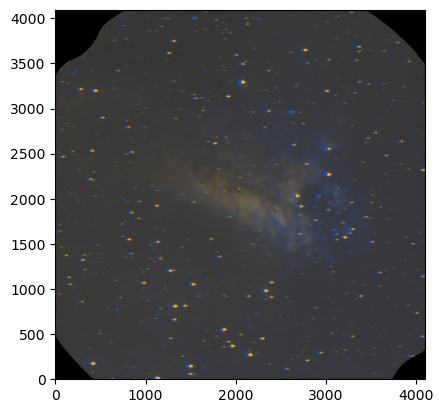

<Figure size 500x500 with 0 Axes>

In [53]:
imagen = make_lupton_rgb(img_v / np.percentile(img_v, 99), img_prom / np.percentile(img_prom, 99), img_b / np.percentile(img_b, 99), minimum = 0.01, Q = 8, stretch = 1.2,  filename="color.jpeg")
plt.imshow(imagen, origin='lower')
#/ np.percentile(img_v, 99), esto asegura que la mayoría de los píxeles estén entre 0 y 1 para que los colores no se saturen al combinarse.
fig = plt.figure(figsize=(5,5))
zscale_v = ZScaleInterval(contrast=0.25)
min_value,max_value = zscale_v.get_limits(imagen)
#/ np.percentile(img_v, 99), esto asegura que la mayoría de los píxeles estén entre 0 y 1 para que los colores no se saturen al combinarse.
# minium: nivel mínimo de brillo
# Q:  parámetro de compresión de brillo
#stretch: estiramiento del contraste